<a href="https://colab.research.google.com/github/Welle-Kim/Based-on-the-Review/blob/master/3_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%8A%B9%ED%95%98%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
ls

 배포@
 알고리즘/
'한국어 화용론적 맥락 (1).gdoc'
'2022 OUTTA AI 부트캠프_솔루션 열람 서약서_김초원 (1).gdoc'
'2022 OUTTA AI 부트캠프_솔루션 열람 서약서_김초원.gdoc'
'2022 OUTTA AI 부트캠프_솔루션 열람 서약서.gdoc'
'2022 OUTTA AI 부트캠프_솔루션 열람 서약서_김초원.pdf'
'자료구조와 알고리즘 2일차.ipynb'
 6조@
'6조 프로젝트 주간일지(개인).gsheet'
 A반_2조@
'Chatbot project'/
 Classroom/
'Colab Notebooks'/
 data@
 작명.gdoc
'한국어 화용론적 맥락.gdoc'
'언어학습 기획안.gdoc'
'머신러닝을 위한 기초 수학.gdoc'
 GSAT/
'복습(ML)'/
 mult_DL@
 multi_base@
 multi_ML@
 멀티모달_Part_06/
 멀티모달_Part_11/
'김초원 서약서.pdf'
'청일점조 피피티.pptx(김초원 수정).pptx'
'살려조 project'@
'Recording by myself'/
 subway/


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

  사용일자       노선명     역명  승차총승객수      하차총승객수  등록일자
0  일산선        주엽   6123  6290.0  20200904.0   NaN
1  일산선        대화  10034  7923.0  20200904.0   NaN
2  장항선        봉명    802   794.0  20200904.0   NaN
3  장항선  쌍용(나사렛대)   1335  1189.0  20200904.0   NaN
4  중앙선        아신    382   387.0  20200904.0   NaN
            사용일자  노선명   역명   승차총승객수   하차총승객수        등록일자
523336  20210531  안산선   반월   4361.0   4161.0  20210603.0
523337  20210531  안산선  대야미   4898.0   4540.0  20210603.0
523338  20210531  안산선   산본  15489.0  16517.0  20210603.0
523339  20210531  수인선   인천    945.0   1500.0  20210603.0
523340  20210531  분당선   수서  13158.0  13246.0  20210603.0
사용일자       object
노선명        object
역명         object
승차총승객수    float64
하차총승객수    float64
등록일자      float64
dtype: object
조회역 입력:한양대


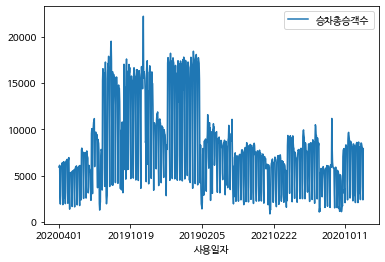

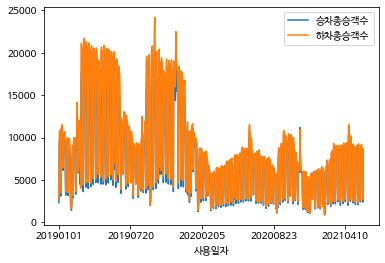

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm
import csv

### 한글 표기
# font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family='NanumBarunGothic') 

def Csv_reset(fn):
    ### csv 파일 전처리 함수
    f = open('./subway'+fn, encoding='cp949')
    data = csv.reader(f)
    # "사용일자"', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'

    next(data)
    data_lst = []
    for row in data:
        data_lst.append(row[:6])

    df = pd.DataFrame(data_lst, columns=['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'])
    df.to_csv('./subway'+fn, encoding='cp949', index=False)
    f.close()

def file_read():
    ### subway 폴더에 있는 모든 파일 하나로 만들기
    filePath='./subway/'
    fileName=os.listdir(filePath)  # subway 폴더의 모든 파일 및 하위 폴더 정보를 리스트형으로 가져와 저장

    df1=pd.DataFrame()

    for fn in fileName:
        ### try ~ except : 예외처리 구문
        #print(fn)
        try:   # 정상코드 수행
            df2=pd.read_csv(filePath+fn, encoding='cp949')
        except: # try 구문에서 에러 발생시 처리하기 위한 구문
            Csv_reset(fn)
            df2 = pd.read_csv(filePath + fn, encoding='cp949')
        # 데이터 한개의 파일로 만들기
        df1=pd.concat([df1, df2])

    df1=df1.reset_index(drop=True)

    return df1

def subway_sch1(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2.info())
    df2 = df2.astype({'승차총승객수': 'int64','사용일자':'str'})
    df2.plot(x='사용일자', y='승차총승객수')
    plt.show()

def subway_sch2(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2.info())
    df2 = df2.astype({'승차총승객수': 'int64','사용일자':'str'})
    df2=df2.groupby('사용일자')[['승차총승객수','하차총승객수']].sum()
    df2.plot()
    plt.show()


### 사용자 함수 호출 부분
df1=file_read()
print(df1.head())
print(df1.tail())

print(df1.dtypes)

subway_name=input('조회역 입력:')
subway_sch1(df1, subway_name)
subway_sch2(df1, subway_name)